# MNIST Digit Classification 

imports


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Train Test Split not required as mnist is already split
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

importing dataset

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_train:", X_train[0].shape)
print(X_train[0])         #X_train[i] is a 28×28 grayscale image of a handwritten digit.


Shape of X_train: (60000, 28, 28)
Shape of X_train: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [ 

Text(0.5, 1.0, 'Label: 5')

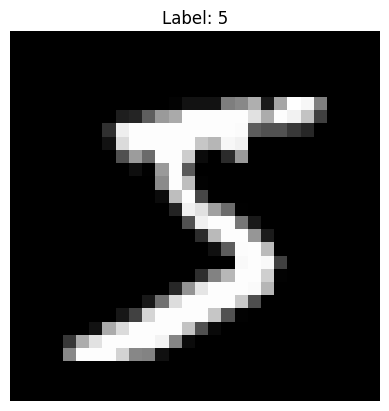

In [7]:
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.title(f"Label: {y_train[0]}")

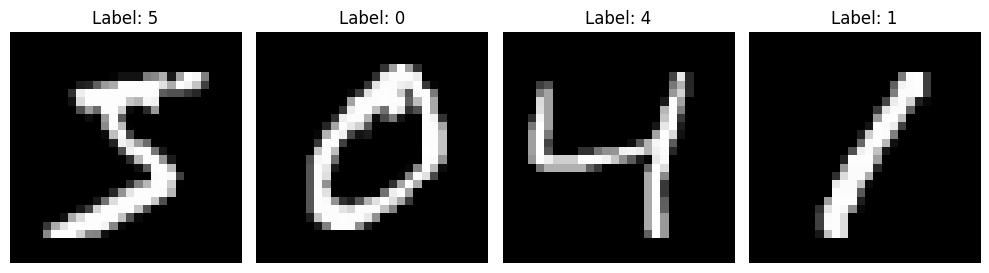

In [8]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='grey')   #Displays the image at index i from X_train
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
np.unique(y_train)  # Displays unique labels in y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

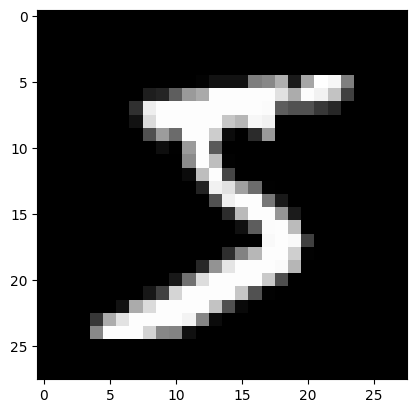

In [11]:
# printing the 1st image

print(X_train[0])
plt.imshow(X_train[0], cmap='gray')

**Building the Neural Network** (ANN and CNN)

Building ANN Model

In [12]:
model = tf.keras.Sequential([
                          tf.keras.layers.Flatten(input_shape=(28,28)),
                          tf.keras.layers.Dense(50, activation='relu'),
                          tf.keras.layers.Dense(50, activation='relu'),
                          tf.keras.layers.Dense(10, activation='sigmoid')
])

d:\python\DL_proj\dl_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# compiling the ANN model

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# training the ANN model

history=model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)   #After each batch, the model updates its weights using backpropagation.

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8387 - loss: 0.5564 - val_accuracy: 0.9393 - val_loss: 0.2014
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9494 - loss: 0.1664 - val_accuracy: 0.9538 - val_loss: 0.1555
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9653 - loss: 0.1190 - val_accuracy: 0.9587 - val_loss: 0.1368
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9725 - loss: 0.0931 - val_accuracy: 0.9616 - val_loss: 0.1245
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9777 - loss: 0.0747 - val_accuracy: 0.9632 - val_loss: 0.1246
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9818 - loss: 0.0610 - val_accuracy: 0.9648 - val_loss: 0.1194
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9858 - loss: 0.0496 - val_accuracy: 0.9656 - val_loss: 0.1217
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9882 - loss: 0.0417 - 

In [18]:
print(history.history.keys()) 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


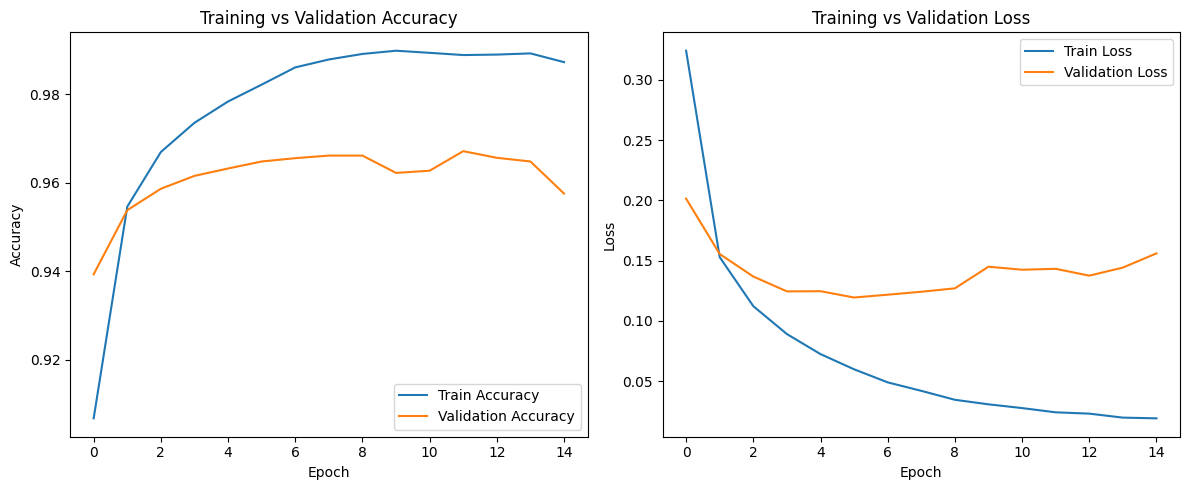

In [16]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()